# **Support Vector Machines**

# 1 What do you understand by maximal margin classifier? Why is it beneficial?

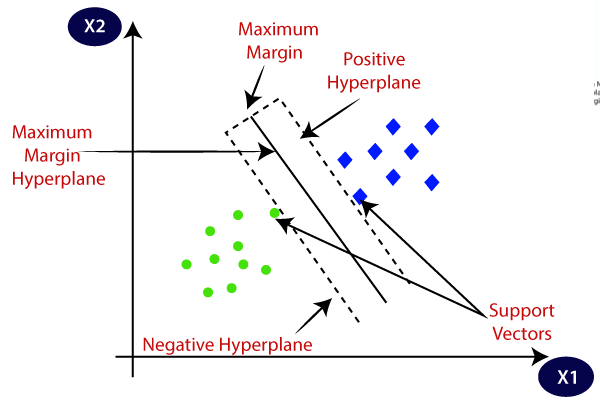

In [1]:
from IPython.display import Image
Image(filename='images/SVM.png')

A maximal margin classifier is a type of linear classifier that aims to find the hyperplane in the feature space that maximally separates two classes. This hyperplane is chosen such that it is furthest from any data point in the training set, which is why it's also known as the maximum-margin hyperplane.

The distance between the hyperplane and the closest data point from either class is known as the margin. The goal of a maximal margin classifier is to maximize this margin.

The benefits of a maximal margin classifier include:

1. **Robustness**: By maximizing the margin, the classifier is less sensitive to individual data points. This makes it more robust to noise and minor variations in the data.

2. **Generalization**: A larger margin often leads to better generalization on unseen data. This is because the classifier is not overly influenced by the training data and can therefore make better predictions on new data.

3. **Support Vectors**: The data points that lie on the margin (or on the wrong side of the margin in case of non-separable data) are called support vectors. These are the only data points that influence the decision boundary, making the classifier efficient and computationally less expensive.

The most common example of a maximal margin classifier is the Support Vector Machine (SVM) with a linear kernel. However, it's important to note that maximal margin classifiers require the data to be linearly separable. If the data is not linearly separable, a soft margin classifier (like SVM with a non-linear kernel or SVM with a soft margin) might be a better choice.

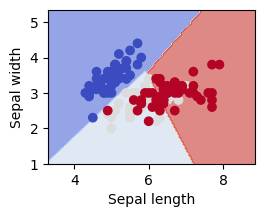

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
# Let's use the standard iris dataset. For simplicity, we will use the 1st two features only.
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# Now, let's create a linear SVM classifier instance and fit the iris dataset.
svc_classifier = svm.SVC(kernel='linear').fit(X, y)
# create a mesh to plot in
h = .05 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
predicted_y = svc_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
predicted_y = predicted_y.reshape(xx.shape)
plt.contourf(xx, yy, predicted_y, cmap=plt.cm.coolwarm, alpha=0.6)
# Plot the input training data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# 2 How do you train a Support Vector Machine (SVM)? What about hard SVM and soft SVM?

Training a Support Vector Machine (SVM) involves solving an optimization problem to find the hyperplane that maximizes the margin between the classes in the training data. The data points that lie on the margin (or on the wrong side of the margin in case of non-separable data) are called support vectors. These are the only data points that influence the decision boundary.

There are two types of SVMs: Hard Margin SVM and Soft Margin SVM.

1. **Hard Margin SVM**: This is the original form of SVM, and it assumes that the data is linearly separable. The goal is to find the hyperplane that maximizes the margin while correctly classifying all training instances. However, Hard Margin SVM can be sensitive to outliers and may not perform well when the data is not perfectly separable.

2. **Soft Margin SVM**: This form of SVM allows some instances to be misclassified or to end up in the margin. The goal is still to maximize the margin, but also to balance this with the objective of minimizing the classification error. The balance between maximizing the margin and minimizing the classification error is controlled by a hyperparameter, often denoted as 'C'. A smaller 'C' creates a wider margin but allows more margin violations. A larger 'C' creates a narrower margin but fewer margin violations.

In the code you provided, a linear SVM (which is a Hard Margin SVM if the data is linearly separable) is trained using the `svm.SVC(kernel='linear').fit(X, y)` line. The 'C' parameter is not specified, so it defaults to 1.0, which is a reasonable middle ground for the Soft Margin SVM. If the data is not linearly separable, this will act as a Soft Margin SVM.

# 3 What is a kernel? Explain the Kernel trick.

A kernel in the context of machine learning is a function that computes the dot product of the transformations of two vectors. It allows us to operate in the original feature space without explicitly computing the coordinates of the data in a higher dimensional space.

The Kernel trick is a method used in machine learning to use a linear classifier to solve a non-linear problem. It transforms the linearly inseparable data into a higher dimension where it becomes linearly separable.

Here's how it works:

1. Map the input data into a higher-dimensional space using a kernel function.
2. In this higher-dimensional space, find the hyperplane that separates the classes.
3. When a prediction is needed for a new instance, transform this instance into the higher-dimensional space and see on which side of the hyperplane it falls.

The beauty of the Kernel trick is that it allows us to work in high-dimensional spaces with the same computational complexity as in the original feature space. This is because the kernel function can compute the dot product of the transformed vectors directly, without needing to compute the transformation itself.

Commonly used kernels include the linear kernel, polynomial kernel, and radial basis function (RBF) or Gaussian kernel. The choice of kernel depends on the data and the problem at hand.

# 4 Name some common kernels. How do you select a particular kernel for your problem?

Commonly used kernels in Support Vector Machines (SVMs) include:

1. **Linear Kernel**: This is the simplest kernel, defined as the dot product of two instances. It's used when the data is linearly separable.

2. **Polynomial Kernel**: This kernel allows for polynomial decision boundaries. The degree of the polynomial determines the complexity of the decision boundary.

3. **Radial Basis Function (RBF) or Gaussian Kernel**: This is a popular kernel for non-linear data. It can map instances into an infinite-dimensional space, making it capable of handling any number of features.

4. **Sigmoid Kernel**: This kernel is similar to the sigmoid function in Logistic Regression. It's mainly used in neural networks.

Choosing the right kernel for your problem depends on several factors:

1. **Nature of the Data**: If the data is linearly separable, a linear kernel is a good choice. If the data is not linearly separable, a non-linear kernel like the RBF or polynomial kernel might be better.

2. **Number of Features and Instances**: If the number of features is large compared to the number of instances, a linear kernel might work well. If the number of instances is large compared to the number of features, a non-linear kernel might be better.

3. **Computational Resources**: Non-linear kernels are more computationally expensive than linear kernels. If computational resources are limited, a linear kernel might be a better choice.

4. **Cross-Validation**: The best way to choose a kernel is to try different kernels and select the one that performs best on a cross-validation set.

Remember, the choice of kernel is part of the model selection process, and it's important to consider the trade-offs between model complexity and model performance.

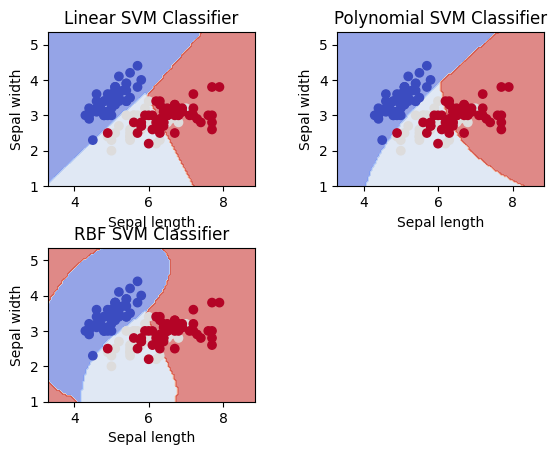

In [5]:
# Let's go back to the code in question 1 and try different kernel methods.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
# Let's use the standard iris dataset. For simplicity, we will use the 1st two features only.
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
# Now, let's create SVM classifier instances and fit the iris dataset.
linear_classifier = svm.SVC(kernel='linear')
linear_classifier.fit(X, y)
poly_classifier = svm.SVC(kernel='poly', degree=3)
poly_classifier.fit(X, y)
rbf_classifier = svm.SVC(kernel='rbf', gamma=0.8)
rbf_classifier.fit(X, y)
# create a mesh to plot in
h = .05 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['Linear SVM Classifier', 'Polynomial SVM Classifier', 'RBF SVM Classifier']
for index, classifier in enumerate((linear_classifier, poly_classifier, rbf_classifier)):
    plt.subplot(2, 2, index + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    predicted_y = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    predicted_y = predicted_y.reshape(xx.shape)
    plt.contourf(xx, yy, predicted_y, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[index])
plt.show()

# 5 When training a Support Vector Machine, what value are you optimizing for?

When training a Support Vector Machine (SVM), you are optimizing for two values:

1. **Margin Maximization**: The primary goal of an SVM is to find the hyperplane that maximally separates the classes in the training data. This is achieved by maximizing the margin, which is the distance between the hyperplane and the closest data points from each class (these points are known as support vectors).

2. **Cost Function Minimization**: In the case of a Soft Margin SVM, where some misclassifications are allowed for better generalization, you also aim to minimize a cost function. This cost function is a trade-off between maximizing the margin and minimizing the classification error. The balance between these two objectives is controlled by a hyperparameter, often denoted as 'C'. A smaller 'C' creates a wider margin but allows more margin violations. A larger 'C' creates a narrower margin but fewer margin violations.

In the code you provided, the `svm.SVC().fit(X, y)` function is used to train the SVM classifiers. This function internally performs the optimization to find the best hyperplane according to the specified kernel and parameters.

# 6 How does a kernel method scale with the number of instances (e.g. a Gaussian rbf kernel)?

Kernel methods, such as the Gaussian Radial Basis Function (RBF) kernel, scale quadratically with the number of instances in the training set. This is because the kernel function needs to compute the pairwise similarity between all instances in the training set, resulting in a matrix of size n x n, where n is the number of instances.

This quadratic scaling can make kernel methods computationally expensive and memory-intensive for large datasets. For example, if you have 100,000 instances, you would need to compute and store 10 billion (100,000^2) pairwise similarities.

However, Support Vector Machines (SVMs) with kernel methods have a unique property that can help mitigate this issue. During training, only a subset of the instances (the support vectors) are used to define the decision boundary. This means that the complexity of making predictions with an SVM is proportional to the number of support vectors, not the total number of instances.

In practice, there are also techniques to handle large datasets with kernel methods, such as using a subset of the data or an approximation of the kernel function, or using online SVM algorithms that process one instance at a time.

# 7 Describe some of the ways to overcome the scaling issues.

There are several strategies to overcome the scaling issues associated with kernel methods in machine learning:

1. **Sampling**: If the dataset is very large, you can use a representative subset of the data for training. Techniques like stratified sampling ensure that the sample is representative of the class distribution in the full dataset.

2. **Feature Selection**: Reduce the number of features in your dataset by keeping only the most relevant features. This can be done using techniques like correlation analysis, Recursive Feature Elimination (RFE), or using feature importance from a tree-based model.

3. **Dimensionality Reduction**: Techniques like Principal Component Analysis (PCA) can reduce the dimensionality of your data by creating new features that maximize the variance in the data.

4. **Kernel Approximation**: Approximate the kernel function with a function that is cheaper to compute. For example, the Nyström method and the Random Fourier Features method are two commonly used kernel approximation techniques.

5. **Online SVMs**: Use an online SVM algorithm that processes one instance at a time. These algorithms are designed to handle large datasets and can be faster than batch SVM algorithms for large datasets.

6. **Parallelization**: If possible, leverage parallel processing capabilities of your hardware to train models on subsets of the data simultaneously.

Remember, there's always a trade-off between computational efficiency and model performance. The key is to find a balance that's acceptable for your specific use case.

# 8 What are some of the pros and cons of using Gaussian processes or general kernel methods approach to learning?

Gaussian processes and general kernel methods are powerful tools in machine learning, but like all methods, they have their pros and cons.

**Pros of Gaussian Processes and Kernel Methods:**

1. **Flexibility**: Kernel methods can model complex, non-linear relationships. By choosing different kernel functions, they can model a wide variety of data structures.

2. **Interpretability**: Gaussian processes provide a measure of uncertainty for predictions, which can be very useful in understanding the model's confidence in its predictions.

3. **No Need for Feature Engineering**: Kernel methods can automatically handle interactions between features, so there's less need for manual feature engineering.

**Cons of Gaussian Processes and Kernel Methods:**

1. **Scalability**: Kernel methods scale poorly with the number of instances because they require the computation and storage of an n x n matrix, where n is the number of instances. Gaussian processes also scale poorly for the same reason.

2. **Choice of Kernel**: The performance of kernel methods depends heavily on the choice of kernel and its parameters. Choosing the right kernel and tuning its parameters can be challenging.

3. **Overfitting**: Without proper regularization, kernel methods can overfit to the training data, especially with complex kernels.

4. **Lack of Sparsity**: Kernel methods typically use all the data points in the training set to make predictions, which can be computationally expensive for large datasets. In contrast, some other methods (like Support Vector Machines) only use a subset of the training data (the support vectors) to make predictions.

Remember, the choice between Gaussian processes, kernel methods, and other machine learning methods depends on the specific problem, the nature of the data, and the computational resources available.

# 9 Can you find the solutions in SVMs which are globally optimal?

Yes, the solution found by a Support Vector Machine (SVM) is globally optimal. This is because the problem solved by an SVM is a convex optimization problem.

In a convex optimization problem, any local minimum is also a global minimum. This property is very useful in machine learning, as it means that the solution found by the algorithm is the best possible solution and is not dependent on the initial conditions or the path taken by the algorithm.

In the case of an SVM, the convex optimization problem is to find the hyperplane that maximizes the margin between the classes while minimizing the classification error (in the case of a Soft Margin SVM). The solution to this problem is the set of weights that define the hyperplane, and this solution is globally optimal.

# **Thank You!**